# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['norman wells',
 'pangnirtung',
 'lavrentiya',
 'camacari',
 'illoqqortoormiut',
 'faanui',
 'punta arenas',
 'payo',
 'rikitea',
 'ushuaia',
 'mataura',
 'tasiilaq',
 'clyde river',
 'longyearbyen',
 'milos',
 'mys shmidta',
 'airai',
 'sakakah',
 'hauterive',
 'jamestown',
 'komsomolskiy',
 'barrow',
 'yellowknife',
 'bluff',
 'hobart',
 'hermanus',
 'belyy yar',
 'saint-philippe',
 'albany',
 'iqaluit',
 'kesteren',
 'victoria',
 'ponta delgada',
 'walvis bay',
 'tuktoyaktuk',
 'kampot',
 'chuy',
 'atuona',
 'hilo',
 'sentyabrskiy',
 'broome',
 'maniitsoq',
 'qaanaaq',
 'buala',
 'karratha',
 'umuarama',
 'bonthe',
 'pevek',
 'karauzyak',
 'umzimvubu',
 'busselton',
 'bukama',
 'ahipara',
 'thompson',
 'vanavara',
 'taolanaro',
 'barentsburg',
 'kailua',
 'vao',
 'weihai',
 'broken hill',
 'vaini',
 'todos santos',
 'najran',
 'klaksvik',
 'khatanga',
 'kropotkin',
 'port alfred',
 'port lincoln',
 'cape town',
 'lowestoft',
 'pisco',
 'kapaa',
 'tazovskiy',
 'georgetown',
 'provid

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Set up lists to hold reponse info
names = []
temp = []
resp_obj=[]
lat=[]
long=[]
cloudiness=[]
windspeed=[]
humidity=[]
country=[]
date=[]
cnt = 0
for i,city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        resp_obj.append(response)
        names.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing record {i+1} of {len(cities)} for the city: {city}')
        time.sleep(0.5)
    except:
        print(f'City not found.')  

Processing record 1 of 599 for the city: norman wells
Processing record 2 of 599 for the city: pangnirtung
Processing record 3 of 599 for the city: lavrentiya
Processing record 4 of 599 for the city: camacari
City not found.
Processing record 6 of 599 for the city: faanui
Processing record 7 of 599 for the city: punta arenas
Processing record 8 of 599 for the city: payo
Processing record 9 of 599 for the city: rikitea
Processing record 10 of 599 for the city: ushuaia
Processing record 11 of 599 for the city: mataura
Processing record 12 of 599 for the city: tasiilaq
Processing record 13 of 599 for the city: clyde river
Processing record 14 of 599 for the city: longyearbyen
Processing record 15 of 599 for the city: milos
City not found.
Processing record 17 of 599 for the city: airai
Processing record 18 of 599 for the city: sakakah
Processing record 19 of 599 for the city: hauterive
Processing record 20 of 599 for the city: jamestown
Processing record 21 of 599 for the city: komsomolsk

Processing record 171 of 599 for the city: asyut
Processing record 172 of 599 for the city: jyvaskyla
Processing record 173 of 599 for the city: duldurga
Processing record 174 of 599 for the city: lahij
Processing record 175 of 599 for the city: swan hill
Processing record 176 of 599 for the city: ocsod
Processing record 177 of 599 for the city: campo do brito
Processing record 178 of 599 for the city: kamina
Processing record 179 of 599 for the city: lakes entrance
Processing record 180 of 599 for the city: beringovskiy
Processing record 181 of 599 for the city: namibe
Processing record 182 of 599 for the city: nacajuca
Processing record 183 of 599 for the city: antakya
Processing record 184 of 599 for the city: upernavik
Processing record 185 of 599 for the city: bethel
Processing record 186 of 599 for the city: aklavik
Processing record 187 of 599 for the city: new norfolk
Processing record 188 of 599 for the city: khor
City not found.
Processing record 190 of 599 for the city: bath

Processing record 338 of 599 for the city: harper
Processing record 339 of 599 for the city: nitra
City not found.
Processing record 341 of 599 for the city: talaya
Processing record 342 of 599 for the city: chapais
Processing record 343 of 599 for the city: lixourion
City not found.
Processing record 345 of 599 for the city: shingu
Processing record 346 of 599 for the city: immokalee
Processing record 347 of 599 for the city: baruun-urt
Processing record 348 of 599 for the city: port augusta
Processing record 349 of 599 for the city: leningradskiy
Processing record 350 of 599 for the city: vallenar
Processing record 351 of 599 for the city: nanortalik
Processing record 352 of 599 for the city: codrington
Processing record 353 of 599 for the city: graaff-reinet
Processing record 354 of 599 for the city: sorland
Processing record 355 of 599 for the city: torbay
Processing record 356 of 599 for the city: naze
Processing record 357 of 599 for the city: pochutla
Processing record 358 of 59

Processing record 506 of 599 for the city: fort nelson
Processing record 507 of 599 for the city: luis correia
Processing record 508 of 599 for the city: tibu
Processing record 509 of 599 for the city: mogadishu
Processing record 510 of 599 for the city: srednekolymsk
Processing record 511 of 599 for the city: carnduff
Processing record 512 of 599 for the city: caconda
Processing record 513 of 599 for the city: carutapera
Processing record 514 of 599 for the city: pando
Processing record 515 of 599 for the city: wad rawah
Processing record 516 of 599 for the city: miraflores
Processing record 517 of 599 for the city: pokhara
Processing record 518 of 599 for the city: blythe
Processing record 519 of 599 for the city: awjilah
City not found.
Processing record 521 of 599 for the city: inverell
Processing record 522 of 599 for the city: baykit
Processing record 523 of 599 for the city: milot
Processing record 524 of 599 for the city: douentza
Processing record 525 of 599 for the city: aver

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_dict = {
    "City": names,
    "Lat":lat,
    "Lng":long,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date
}
cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv('../output_data/cities.csv')
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,-12.96,70,100,18.41,CA,1644204055
1,Pangnirtung,66.1451,-65.7125,-38.09,96,100,4.47,CA,1644204397
2,Lavrentiya,65.5833,-171.0000,-15.63,95,56,5.19,RU,1644204530
3,Camaçari,-12.6975,-38.3242,82.17,89,95,3.67,BR,1644204579
4,Faanui,-16.4833,-151.7500,81.01,75,100,20.13,PF,1644204048
...,...,...,...,...,...,...,...,...,...
540,Soure,-0.7167,-48.5233,76.98,89,100,6.64,BR,1644205125
541,Leh,34.1667,77.5833,12.69,94,100,3.40,IN,1644205126
542,Preobrazheniye,42.9019,133.9064,20.64,40,4,5.23,RU,1644205127
543,Wawina,15.4167,-84.4333,67.26,86,9,2.46,HN,1644205128


In [6]:
# file_to_load = "../output_data/cities.csv"
# # Read Purchasing File and store into Pandas data frame
# cities_data_1 = pd.read_csv(file_to_load)
# cities_data_1.head()

In [7]:
print(f"The total No. of unique Cities is: {len(pd.unique(cities_data['City']))}.")

The total No. of unique Cities is: 544.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#check if there are any cities with >100% humidity
high_humidity = cities_data[(cities_data['Humidity'] > 100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
clean_cities_data = cities_data.drop(cities_data[cities_data["Humidity"]>100].index)
clean_cities_data.reset_index(inplace=True)
print(f"The clean No. of unique Cities is: {len(pd.unique(clean_cities_data['City']))}.")

The clean No. of unique Cities is: 544.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Date record

In [10]:
endRunDate = clean_cities_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

## Latitude vs. Humidity Plot

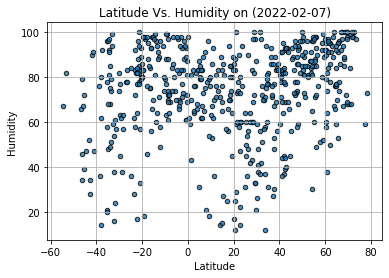

In [11]:
title = "Latitude Vs. Humidity"
Fig_1 = clean_cities_data.plot(kind="scatter", x="Lat", y="Humidity", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_1.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Cloudiness Plot

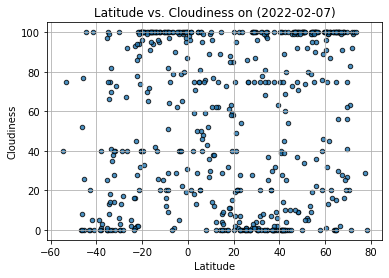

In [12]:
title = "Latitude vs. Cloudiness"
Fig_2 = clean_cities_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_2.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Wind Speed Plot

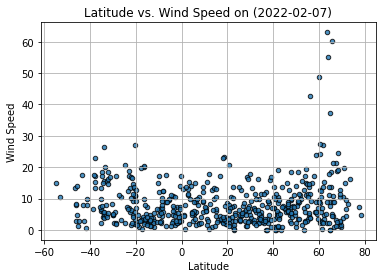

In [13]:
title = "Latitude vs. Wind Speed"
Fig_3 = clean_cities_data.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_3.get_figure().savefig(f"../output_data/{title}.png")

## Linear Regression

In [14]:
def plot_linear_regression(x_values,y_values,y_label,text_coordinates):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #print out
    print(f" Slope:{slope}\n",
      f"Intercept:{intercept}\n",
      f"The r-squared is:{rvalue}\n",
      '--------------------------\n',
      f'{line_eq}') 
    # Plot
    plt.scatter(x_values,y_values, edgecolor="black",linewidth=1,marker="o",alpha=0.8)
    plt.plot(x_values, regress_values, "r-") 
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    plt.savefig(f"../output_data/{title}.png")
    plt.show()

In [15]:
L=0
north_hemi = clean_cities_data.query(f"Lat >= {L}")
south_hemi = clean_cities_data.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:-1.3293044846434228
 Intercept:90.62719384853398
 The r-squared is:-0.8773029406289591
 --------------------------
 y = -1.33 x + 90.63


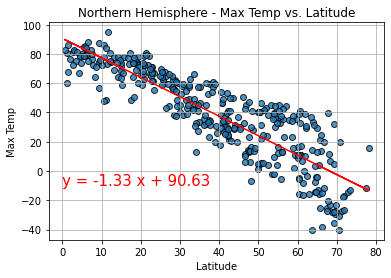

In [16]:
title = "Northern Hemisphere - Max Temp vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (0,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:0.27124903176048293
 Intercept:78.70225964859145
 The r-squared is:0.3864351531447512
 --------------------------
 y = 0.27 x + 78.7


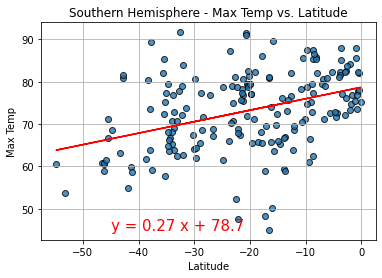

In [17]:
title ="Southern Hemisphere - Max Temp vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (-45,45))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.34484367598090243
 Intercept:60.12394185502153
 The r-squared is:0.34249178919249995
 --------------------------
 y = 0.34 x + 60.12


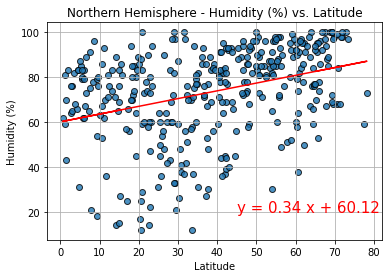

In [18]:
title="Northern Hemisphere - Humidity (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.5582998311892101
 Intercept:85.1939962072349
 The r-squared is:0.36766528874354365
 --------------------------
 y = 0.56 x + 85.19


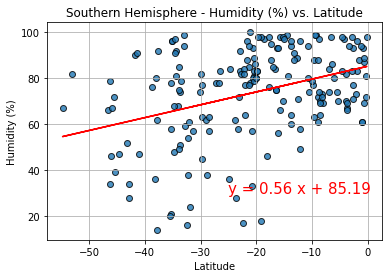

In [19]:
title="Southern Hemisphere - Humidity (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (-25,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.45429233858768764
 Intercept:36.56166730152985
 The r-squared is:0.2247346910075784
 --------------------------
 y = 0.45 x + 36.56


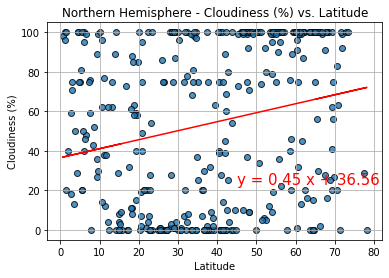

In [20]:
title="Northern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (45,23))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:1.3313068602684508
 Intercept:85.59767390662523
 The r-squared is:0.44119085815744347
 --------------------------
 y = 1.33 x + 85.6


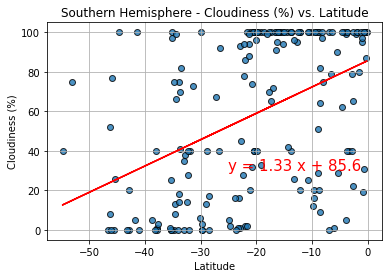

In [21]:
title="Southern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (-25,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:0.08070356028755171
 Intercept:5.073496244183369
 The r-squared is:0.2074916069518491
 --------------------------
 y = 0.08 x + 5.07


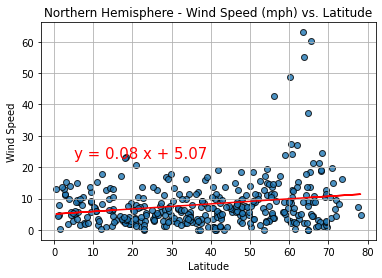

In [22]:
title="Northern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Wind Speed"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (5,23))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:1.3313068602684508
 Intercept:85.59767390662523
 The r-squared is:0.44119085815744347
 --------------------------
 y = 1.33 x + 85.6


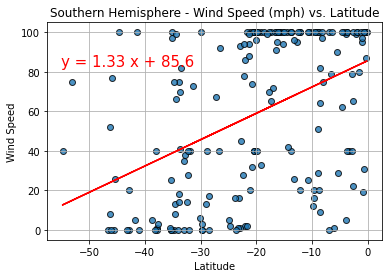

In [23]:
title="Southern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (-55,83))